# Setup and Context

### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. 

<img src=https://i.imgur.com/36pCx5Q.jpg>

Let's see what patterns we can find in the data of the past Nobel laureates. What can we learn about the Nobel prize and our world more generally?

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server. 

In [1]:
%pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.


### Import Statements

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

### Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [4]:
df_data = pd.read_csv('nobel_prize_data.csv')
df_data

year    category                                           prize  \
0    1901   Chemistry               The Nobel Prize in Chemistry 1901   
1    1901  Literature              The Nobel Prize in Literature 1901   
2    1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3    1901       Peace                      The Nobel Peace Prize 1901   
4    1901       Peace                      The Nobel Peace Prize 1901   
..    ...         ...                                             ...   
957  2020    Medicine  The Nobel Prize in Physiology or Medicine 2020   
958  2020       Peace                      The Nobel Peace Prize 2020   
959  2020     Physics                 The Nobel Prize in Physics 2020   
960  2020     Physics                 The Nobel Prize in Physics 2020   
961  2020     Physics                 The Nobel Prize in Physics 2020   

                                            motivation prize_share  \
0    "in recognition of the extraordinary services ...         1/1   
1    "in special recognition of his poetic composit...         1/1   
2    "for his work on serum therapy, especially its...         1/1   
3                                                  NaN         1/2   
4                                                  NaN         1/2   
..                                                 ...         ...   
957           “for the discovery of Hepatitis C virus”         1/3   
958  “for its efforts to combat hunger, for its con...         1/1   
959  “for the discovery of a supermassive compact o...         1/4   
960  “for the discovery of a supermassive compact o...         1/4   
961  “for the discovery that black hole formation i...         1/2   

    laureate_type                     full_name  birth_date  \
0      Individual  Jacobus Henricus van 't Hoff  1852-08-30   
1      Individual               Sully Prudhomme  1839-03-16   
2      Individual        Emil Adolf von Behring  1854-03-15   
3      Individual                Frédéric Passy  1822-05-20   
4      Individual             Jean Henry Dunant  1828-05-08   
..            ...                           ...         ...   
957    Individual              Michael Houghton  1949-07-02   
958  Organization    World Food Programme (WFP)         NaN   
959    Individual                   Andrea Ghez  1965-06-16   
960    Individual               Reinhard Genzel  1952-03-24   
961    Individual                 Roger Penrose  1931-08-08   

                   birth_city             birth_country  \
0                   Rotterdam               Netherlands   
1                       Paris                    France   
2           Hansdorf (Lawice)          Prussia (Poland)   
3                       Paris                    France   
4                      Geneva               Switzerland   
..                        ...                       ...   
957                       NaN            United Kingdom   
958                       NaN                       NaN   
959              New York, NY  United States of America   
960  Bad Homburg vor der Höhe                   Germany   
961                Colchester            United Kingdom   

        birth_country_current     sex         organization_name  \
0                 Netherlands    Male         Berlin University   
1                      France    Male                       NaN   
2                      Poland    Male        Marburg University   
3                      France    Male                       NaN   
4                 Switzerland    Male                       NaN   
..                        ...     ...                       ...   
957            United Kingdom    Male     University of Alberta   
958                       NaN     NaN                       NaN   
959  United States of America  Female  University of California   
960                   Germany    Male  University of California   
961            United Kingdom    Male      University of Oxford   

    organization

Caveats: The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown. I've substituted them with mid-year estimate of July 2nd. 


# Data Exploration & Cleaning

**Challenge**: Preliminary data exploration. 
* What is the shape of `df_data`? How many rows and columns?
* What are the column names?
* In which year was the Nobel prize first awarded?
* Which year is the latest year included in the dataset?

In [5]:
df_data.shape

(962, 16)

In [6]:
df_data.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO'],
      dtype='object')

In [7]:
df_data.year.min()

1901

In [8]:
df_data.year.max()

2020

In [9]:
df_data.year.info()

<class 'pandas.core.series.Series'>
RangeIndex: 962 entries, 0 to 961
Series name: year
Non-Null Count  Dtype
--------------  -----
962 non-null    int64
dtypes: int64(1)
memory usage: 7.6 KB


**Challange**: 
* Are there any duplicate values in the dataset?
* Are there NaN values in the dataset?
* Which columns tend to have NaN values?
* How many NaN values are there per column? 
* Why do these columns have NaN values?  

In [10]:
# checking for duplicates
df_data.duplicated().any()

False

In [11]:
# checking for NaN values
df_data.isna().values.any()

True

In [12]:
# columns containing NaN values
# listing out all the columns containing NaN values
store = []      
for i in df_data.columns:
    if df_data[i].isna().any() == True:
        print(i)
        store.append(i)
        

motivation
birth_date
birth_city
birth_country
birth_country_current
sex
organization_name
organization_city
organization_country
ISO


In [13]:
for s in store:          # printing the total number of NaN for each columns containing NaN's 
    print(f"{s}:  {df_data[s].isna().values.sum()}")

motivation:  88
birth_date:  28
birth_city:  31
birth_country:  28
birth_country_current:  28
sex:  28
organization_name:  255
organization_city:  255
organization_country:  254
ISO:  28


In [14]:
s = ['birth_country','birth_country_current']
df_data[df_data.birth_country.isna()][s]


birth_country birth_country_current
24            NaN                   NaN
60            NaN                   NaN
89            NaN                   NaN
200           NaN                   NaN
215           NaN                   NaN
237           NaN                   NaN
238           NaN                   NaN
283           NaN                   NaN
348           NaN                   NaN
349           NaN                   NaN
366           NaN                   NaN
399           NaN                   NaN
479           NaN                   NaN
523           NaN                   NaN
558           NaN                   NaN
588           NaN                   NaN
659           NaN                   NaN
682           NaN                   NaN
703           NaN                   NaN
730           NaN                   NaN
778           NaN                   NaN
788           NaN                   NaN
801           NaN                   NaN
860           NaN                   NaN
873           NaN                   NaN
897           NaN                   NaN
919           NaN                   NaN
958           NaN                   NaN

### Type Conversions

**Challenge**: 
* Convert the `birth_date` column to Pandas `Datetime` objects
* Add a Column called `share_pct` which has the laureates' share as a percentage in the form of a floating-point number.

#### Convert Year and Birth Date to Datetime

In [15]:
df_data.birth_date = pd.to_datetime(df_data.birth_date)
df_data.birth_date.info()

<class 'pandas.core.series.Series'>
RangeIndex: 962 entries, 0 to 961
Series name: birth_date
Non-Null Count  Dtype         
--------------  -----         
934 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 7.6 KB


#### Add a Column with the Prize Share as a Percentage

In [16]:
numerator =df_data.prize_share.str.replace('/',"")
share_pct = [(int(numerator[i][0])/int(numerator[i][1])*100) for i in range(len(numerator))]
df_data.insert(column="share_pct",value=share_pct, loc=6)

In [17]:
df_data

year    category                                           prize  \
0    1901   Chemistry               The Nobel Prize in Chemistry 1901   
1    1901  Literature              The Nobel Prize in Literature 1901   
2    1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3    1901       Peace                      The Nobel Peace Prize 1901   
4    1901       Peace                      The Nobel Peace Prize 1901   
..    ...         ...                                             ...   
957  2020    Medicine  The Nobel Prize in Physiology or Medicine 2020   
958  2020       Peace                      The Nobel Peace Prize 2020   
959  2020     Physics                 The Nobel Prize in Physics 2020   
960  2020     Physics                 The Nobel Prize in Physics 2020   
961  2020     Physics                 The Nobel Prize in Physics 2020   

                                            motivation prize_share  \
0    "in recognition of the extraordinary services ...         1/1   
1    "in special recognition of his poetic composit...         1/1   
2    "for his work on serum therapy, especially its...         1/1   
3                                                  NaN         1/2   
4                                                  NaN         1/2   
..                                                 ...         ...   
957           “for the discovery of Hepatitis C virus”         1/3   
958  “for its efforts to combat hunger, for its con...         1/1   
959  “for the discovery of a supermassive compact o...         1/4   
960  “for the discovery of a supermassive compact o...         1/4   
961  “for the discovery that black hole formation i...         1/2   

    laureate_type  share_pct                     full_name birth_date  \
0      Individual     100.00  Jacobus Henricus van 't Hoff 1852-08-30   
1      Individual     100.00               Sully Prudhomme 1839-03-16   
2      Individual     100.00        Emil Adolf von Behring 1854-03-15   
3      Individual      50.00                Frédéric Passy 1822-05-20   
4      Individual      50.00             Jean Henry Dunant 1828-05-08   
..            ...        ...                           ...        ...   
957    Individual      33.33              Michael Houghton 1949-07-02   
958  Organization     100.00    World Food Programme (WFP)        NaT   
959    Individual      25.00                   Andrea Ghez 1965-06-16   
960    Individual      25.00               Reinhard Genzel 1952-03-24   
961    Individual      50.00                 Roger Penrose 1931-08-08   

                   birth_city             birth_country  \
0                   Rotterdam               Netherlands   
1                       Paris                    France   
2           Hansdorf (Lawice)          Prussia (Poland)   
3                       Paris                    France   
4                      Geneva               Switzerland   
..                        ...                       ...   
957                       NaN            United Kingdom   
958                       NaN                       NaN   
959              New York, NY  United States of America   
960  Bad Homburg vor der Höhe                   Germany   
961                Colchester            United Kingdom   

        birth_country_current     sex         organization_name  \
0                 Netherlands    Male         Berlin University   
1                      France    Male                       NaN   
2                      Poland    Male        Marburg University   
3                      France    Male                       NaN   
4                 Switzerland    Male                       NaN   
..                        ...     ...                       ...   
957            United Kingdom    Male     University of Alberta   
958                       NaN     NaN                       NaN   
959  United States of America  Female  University of California   
960                   Germany  

# Plotly Donut Chart: Percentage of Male vs. Female Laureates

**Challenge**: Create a [donut chart using plotly](https://plotly.com/python/pie-charts/) which shows how many prizes went to men compared to how many prizes went to women. What percentage of all the prizes went to women?

In [18]:
biology = df_data.sex.value_counts()
biology

Male      876
Female     58
Name: sex, dtype: int64

In [19]:
biology = df_data.sex.value_counts()
fig = px.pie(values=biology,
             color=biology,
            title="Men Against Women",
            hole= 0.5,
            labels=biology.index,
            names = biology.index)
fig.update_traces(textfont_size = 15)
fig.show()

/home/donxcel/anaconda3/envs/tensorflow/lib/python3.9/site-packages/plotly/express/_core.py:137: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  return args["labels"][column]


# Who were the first 3 Women to Win the Nobel Prize?

**Challenge**: 
* What are the names of the first 3 female Nobel laureates? 
* What did the win the prize for? 
* What do you see in their `birth_country`? Were they part of an organisation?

In [20]:
# Names of the first 3 female nobel laureates
df_data.query('sex == "Female"')['full_name'].head(3)

# as we can see Marie Curie was the first lady to have ever won a prix nobel

18                          Marie Curie, née Sklodowska
29    Baroness Bertha Sophie Felicita von Suttner, n...
51                        Selma Ottilia Lovisa Lagerlöf
Name: full_name, dtype: object

In [21]:
df_data.query('sex == "Female"')['motivation'].head(3)


18    "in recognition of the extraordinary services ...
29                                                  NaN
51    "in appreciation of the lofty idealism, vivid ...
Name: motivation, dtype: object

In [22]:
df_data.query('sex == "Female"')['birth_country'].head(3)
# countries of the first 3 ladies to have ever won a prix nobel

18             Russian Empire (Poland)
29    Austrian Empire (Czech Republic)
51                              Sweden
Name: birth_country, dtype: object

In [23]:
df_data.query('sex == "Female"')['organization_name'].head(3)
# we can see they weren't in any organization

18    NaN
29    NaN
51    NaN
Name: organization_name, dtype: object

# Find the Repeat Winners

**Challenge**: Did some people get a Nobel Prize more than once? If so, who were they? 

In [24]:
df_data.full_name.duplicated().any() # shows that some individuals received the price morethan once

True

In [25]:
df_data[df_data.full_name.duplicated()]

year   category                              prize  \
62   1911  Chemistry  The Nobel Prize in Chemistry 1911   
215  1944      Peace         The Nobel Peace Prize 1944   
340  1962      Peace         The Nobel Peace Prize 1962   
348  1963      Peace         The Nobel Peace Prize 1963   
424  1972    Physics    The Nobel Prize in Physics 1972   
505  1980  Chemistry  The Nobel Prize in Chemistry 1980   
523  1981      Peace         The Nobel Peace Prize 1981   

                                            motivation prize_share  \
62   "in recognition of her services to the advance...         1/1   
215                                                NaN         1/1   
340                                                NaN         1/1   
348                                                NaN         1/2   
424  "for their jointly developed theory of superco...         1/3   
505  "for their contributions concerning the determ...         1/4   
523                                                NaN         1/1   

    laureate_type  share_pct  \
62     Individual     100.00   
215  Organization     100.00   
340    Individual     100.00   
348  Organization      50.00   
424    Individual      33.33   
505    Individual      25.00   
523  Organization     100.00   

                                             full_name birth_date  \
62                         Marie Curie, née Sklodowska 1867-11-07   
215  Comité international de la Croix Rouge (Intern...        NaT   
340                                 Linus Carl Pauling 1901-02-28   
348  Comité international de la Croix Rouge (Intern...        NaT   
424                                       John Bardeen 1908-05-23   
505                                   Frederick Sanger 1918-08-13   
523  Office of the United Nations High Commissioner...        NaT   

       birth_city             birth_country     birth_country_current     sex  \
62         Warsaw   Russian Empire (Poland)                    Poland  Female   
215           NaN                       NaN                       NaN     NaN   
340  Portland, OR  United States of America  United States of America    Male   
348           NaN                       NaN                       NaN     NaN   
424   Madison, WI  United States of America  United States of America    Male   
505     Rendcombe            United Kingdom            United Kingdom    Male   
523           NaN                       NaN                       NaN     NaN   

                                organization_name organization_city  \
62                            Sorbonne University             Paris   
215                                           NaN               NaN   
340  California Institute of Technology (Caltech)      Pasadena, CA   
348                                           NaN               NaN   
424                        University of Illinois        Urbana, IL   
505           MRC Laboratory of Molecular Biology         Cambridge   
523                                           NaN               NaN   

         organization_country  ISO  
62                     France  POL  
215                       NaN  NaN  
340  United States of America  USA  
348                       NaN  NaN  
424  United States of America  USA  
505            United Kingdom  GBR  
523                       NaN  NaN

# Number of Prizes per Category

**Challenge**: 
* In how many categories are prizes awarded? 
* Create a plotly bar chart with the number of prizes awarded by category. 
* Use the color scale called `Aggrnyl` to colour the chart, but don't show a color axis.
* Which category has the most number of prizes awarded? 
* Which category has the fewest number of prizes awarded? 

In [26]:
df_data.category.nunique() # there are 6 unique categories in the category column

6

In [27]:
plotting_data = df_data.category.value_counts()
plotting_data

Medicine      222
Physics       216
Chemistry     186
Peace         135
Literature    117
Economics      86
Name: category, dtype: int64

In [28]:
bar = px.bar(x=plotting_data.index,
            y=plotting_data.values,
             text=plotting_data.values,
            color=plotting_data.index,
             color_continuous_scale='Aggrnyl'
             
            )
bar.update_layout(xaxis_title = "Nobel Prize Category", yaxis_title = 'total number')
bar.show()

**Challenge**: 
* When was the first prize in the field of Economics awarded?
* Who did the prize go to?

In [29]:
df_data.year[df_data.category == 'Economics' ].head(1) # it was awarded in 1969

393    1969
Name: year, dtype: int64

In [30]:
df_data.full_name[df_data.category == 'Economics' ].head(1)  #awarded to Jan Tinbergen

393    Jan Tinbergen
Name: full_name, dtype: object

# Male and Female Winners by Category

**Challenge**: Create a [plotly bar chart](https://plotly.com/python/bar-charts/) that shows the split between men and women by category. 
* Hover over the bar chart. How many prizes went to women in Literature compared to Physics?

<img src=https://i.imgur.com/od8TfOp.png width=650>

In [31]:
new_data = df_data.groupby(by=['category','sex'],as_index=False).count()
new_data = new_data.sort_values(by='sex',ascending=False)[['sex','category','prize']]
new_data

sex    category  prize
1     Male   Chemistry    179
3     Male   Economics     84
5     Male  Literature    101
7     Male    Medicine    210
9     Male       Peace     90
11    Male     Physics    212
0   Female   Chemistry      7
2   Female   Economics      2
4   Female  Literature     16
6   Female    Medicine     12
8   Female       Peace     17
10  Female     Physics      4

In [32]:
new_bar  = px.bar(x =new_data.category,
                 y=new_data.prize,
                  title='Number of prizes Awarded per Category split men by women',
                  color_continuous_scale=new_data.prize,
                  labels=new_data.values,
                  color = new_data.sex
                                 )
new_bar.update_layout(xaxis_title = 'Nobel Prize Category',
                     yaxis_title = 'Number of prizes')
new_bar.show()

# Number of Prizes Awarded Over Time

**Challenge**: Are more prizes awarded recently than when the prize was first created? Show the trend in awards visually. 
* Count the number of prizes awarded every year. 
* Create a 5 year rolling average of the number of prizes (Hint: see previous lessons analysing Google Trends).
* Using Matplotlib superimpose the rolling average on a scatter plot.
* Show a tick mark on the x-axis for every 5 years from 1900 to 2020. (Hint: you'll need to use NumPy). 

<img src=https://i.imgur.com/4jqYuWC.png width=650>

* Use the [named colours](https://matplotlib.org/3.1.0/gallery/color/named_colors.html) to draw the data points in `dogerblue` while the rolling average is coloured in `crimson`. 

<img src=https://i.imgur.com/u3RlcJn.png width=350>

* Looking at the chart, did the first and second world wars have an impact on the number of prizes being given out? 
* What could be the reason for the trend in the chart?


year
1901     6
1902     7
1903     7
1904     6
1905     5
        ..
2016    11
2017    12
2018    13
2019    14
2020    12
Name: prize, Length: 117, dtype: int64


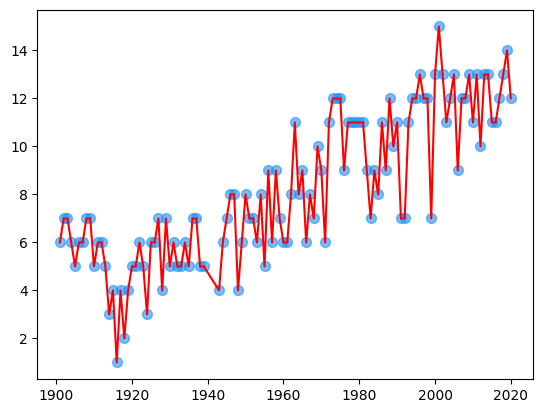

In [33]:
df_year_count = df_data.groupby(by='year').count().prize
number_year_rolling = df_year_count.rolling(window=5).mean()
print(df_year_count)
plt.scatter(
    x = df_year_count.index,
    y = df_year_count.values,
    c='dodgerblue',
    s = 50,
    alpha=0.6
    
)
plt.plot(df_year_count.index,df_year_count.values,
        c = 'red')
plt.show()

In [34]:
number_year_rolling

year
1901     NaN
1902     NaN
1903     NaN
1904     NaN
1905    6.20
        ... 
2016   11.60
2017   12.00
2018   12.00
2019   12.20
2020   12.40
Name: prize, Length: 117, dtype: float64

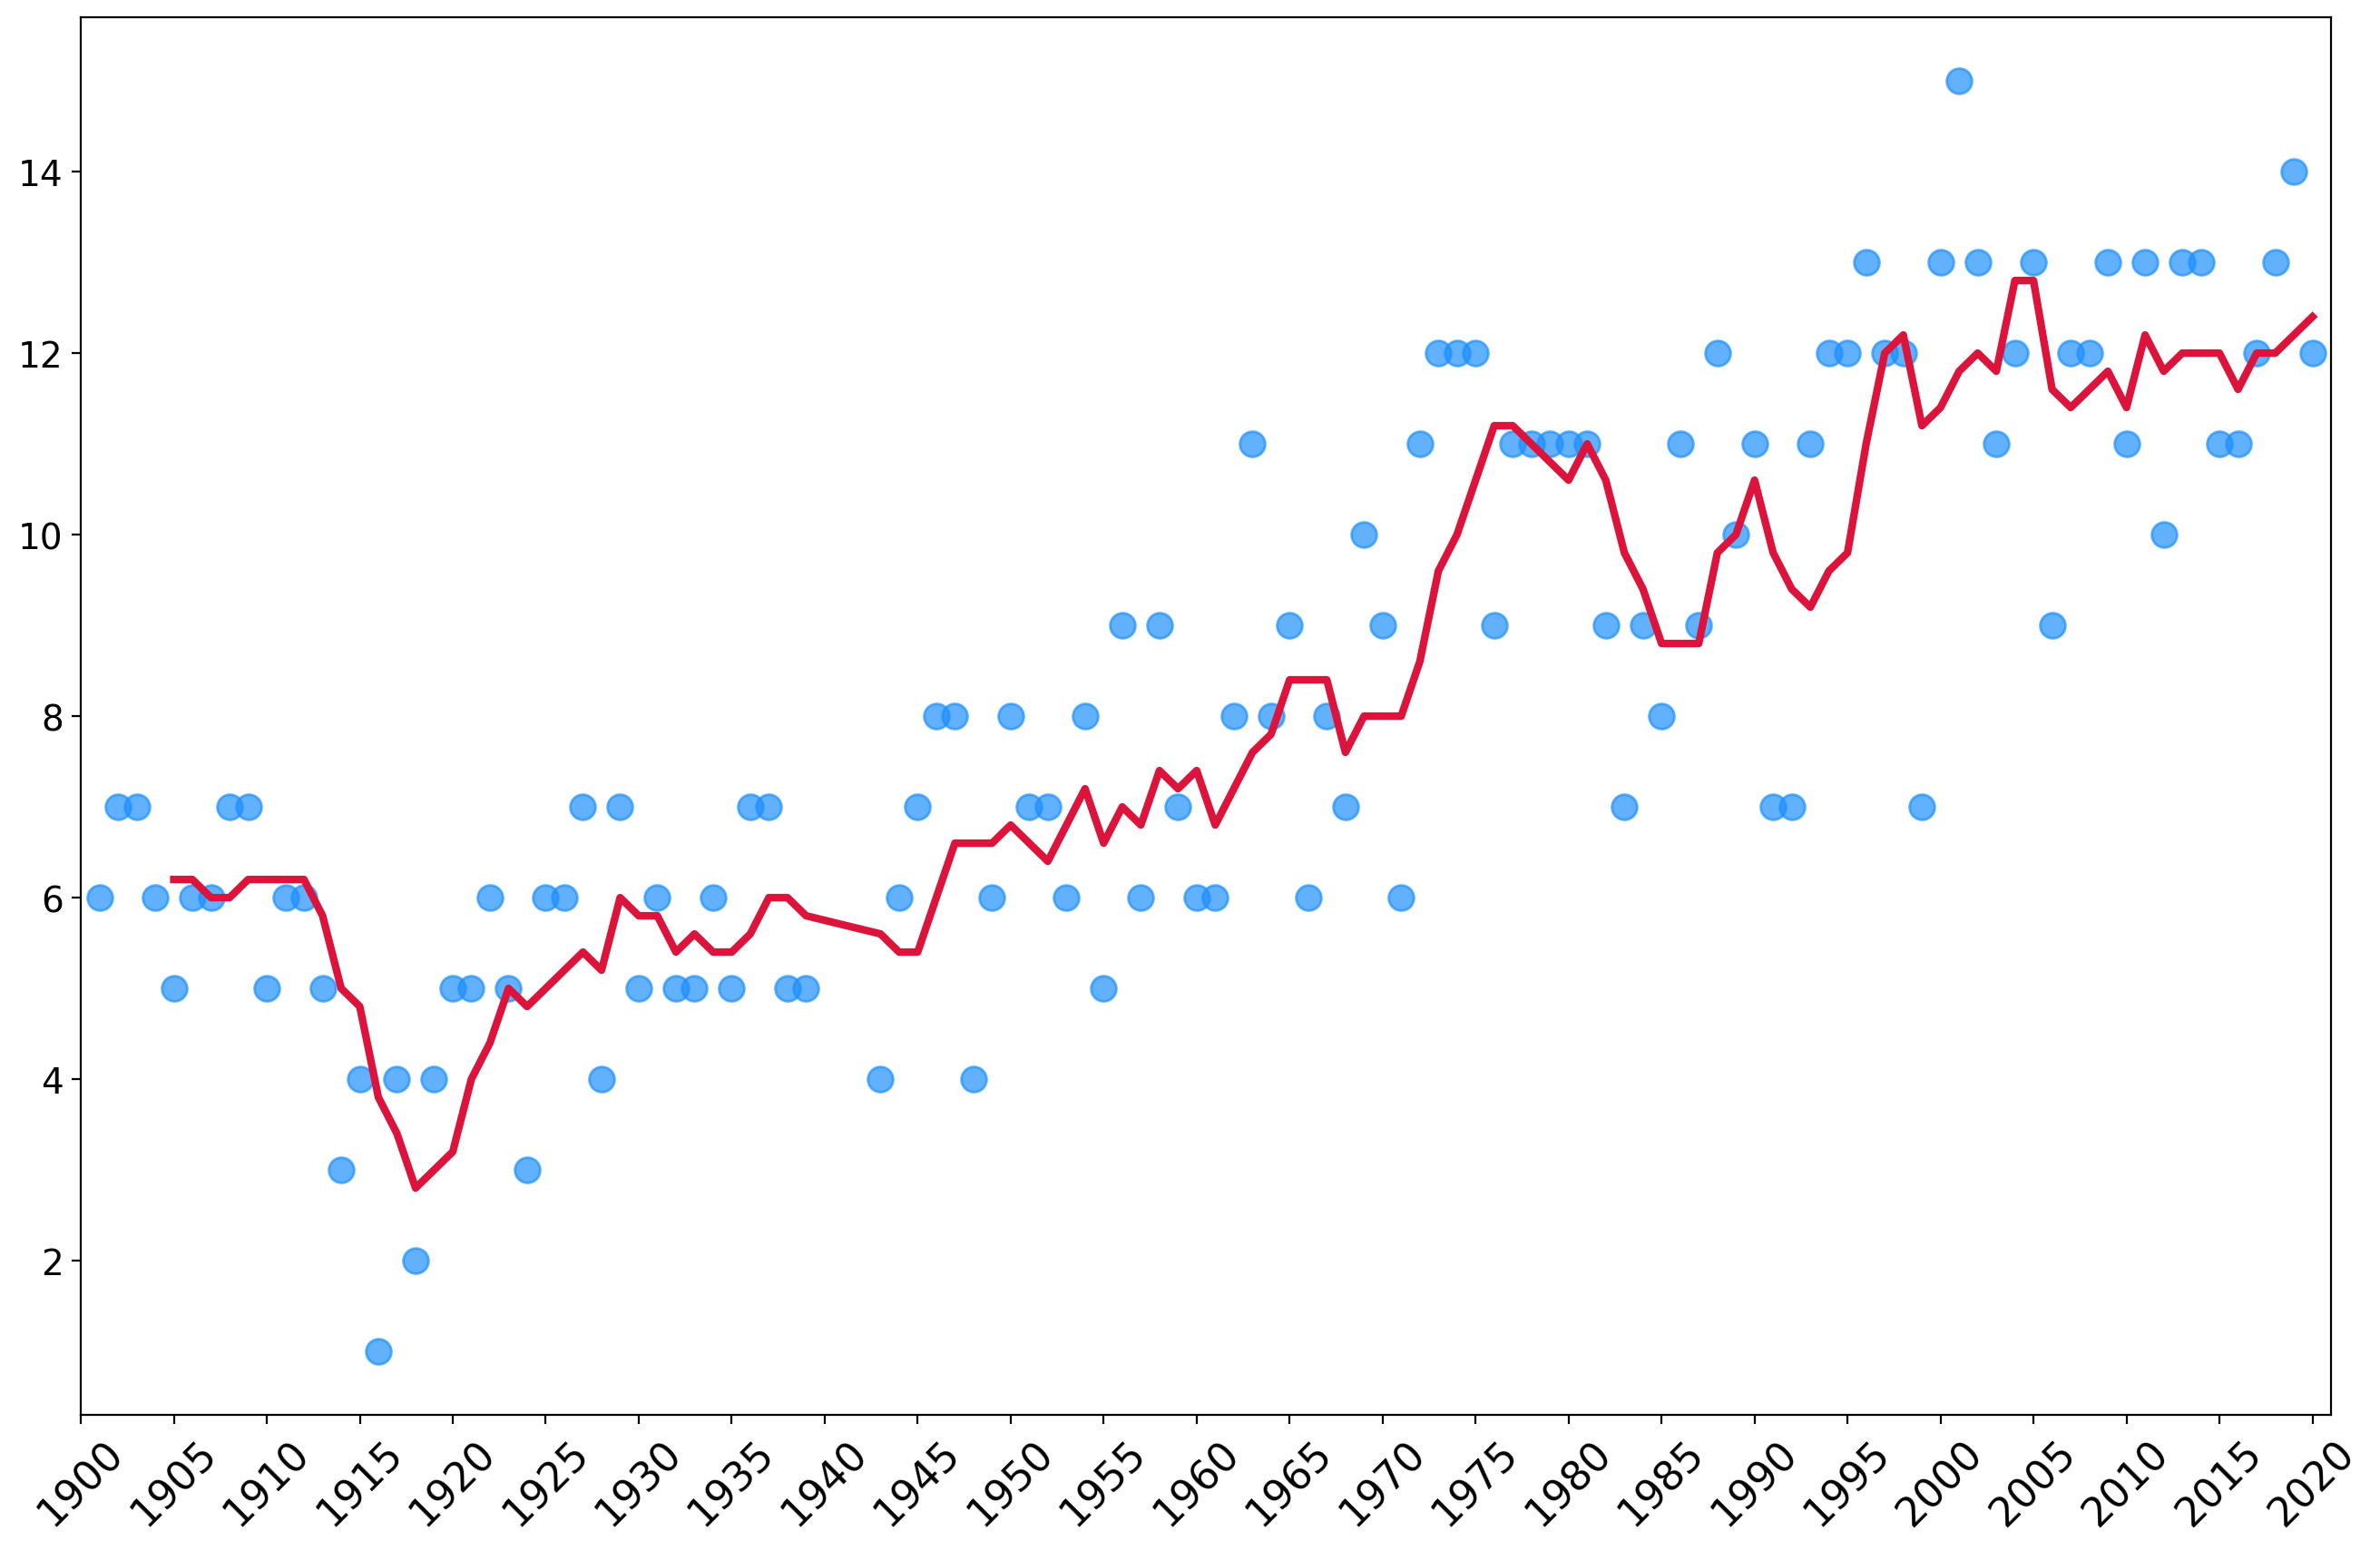

In [35]:
# making the chart more presentable with some styling

plt.figure(figsize= (16,10),dpi=200)
plt.xticks(ticks =np.arange(1900,2021,step=5) ,fontsize  = 16,rotation=45)
plt.yticks(fontsize = 14)
ax = plt.gca()
ax.set_xlim(1900,2021)
ax.scatter(x=df_year_count.index, 
           y=df_year_count.values, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)

ax.plot(df_year_count.index, 
        number_year_rolling.values, 
        c='crimson', 
        linewidth=3,)


# Are More Prizes Shared Than Before?

**Challenge**: Investigate if more prizes are shared than before. 

* Calculate the average prize share of the winners on a year by year basis.
* Calculate the 5 year rolling average of the percentage share.
* Copy-paste the cell from the chart you created above.
* Modify the code to add a secondary axis to your Matplotlib chart.
* Plot the rolling average of the prize share on this chart. 
* See if you can invert the secondary y-axis to make the relationship even more clear. 

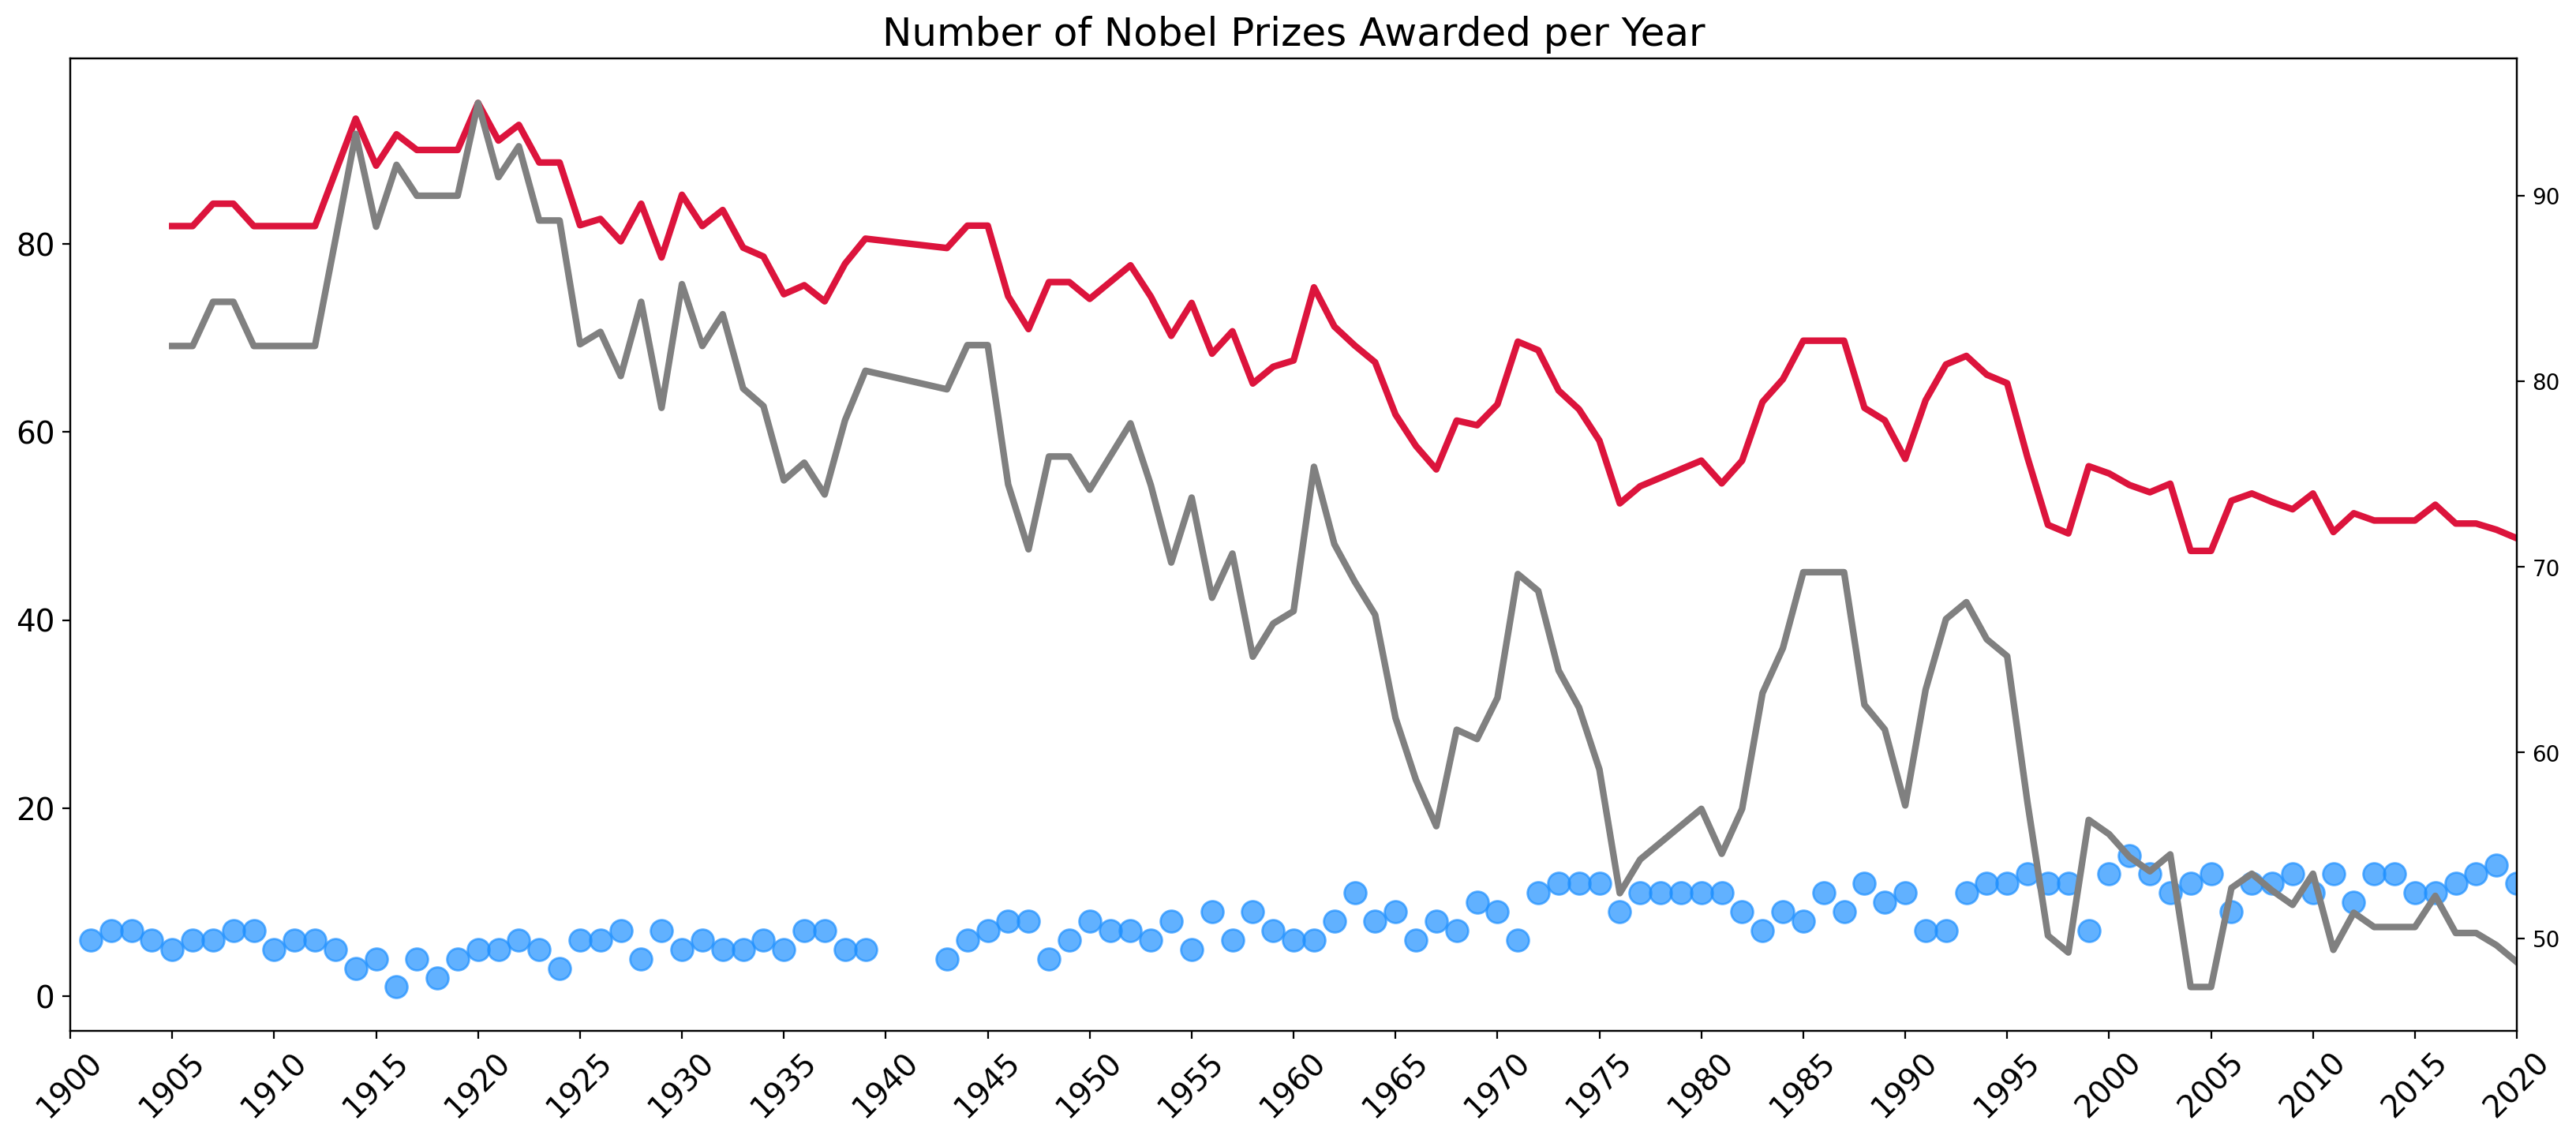

In [36]:


yearly_avg_share = df_data.groupby(by='year').agg({'share_pct': pd.Series.mean})
share_moving_average = yearly_avg_share.rolling(window=5).mean()

plt.figure(figsize=(20,8), dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5), 
           fontsize=14, 
           rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx() # create second y-axis
ax1.set_xlim(1900, 2020)

ax1.scatter(x=df_year_count.index, 
           y=df_year_count.values, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)

ax1.plot(df_year_count.index, 
       share_moving_average.values, 
        c='crimson', 
        linewidth=3,)

# Adding prize share plot on second axis
ax2.plot(df_year_count.index, 
        share_moving_average.values, 
        c='grey', 
        linewidth=3,)

plt.show()


# The Countries with the Most Nobel Prizes

**Challenge**: 
* Create a Pandas DataFrame called `top20_countries` that has the two columns. The `prize` column should contain the total number of prizes won. 

<img src=https://i.imgur.com/6HM8rfB.png width=350>

* Is it best to use `birth_country`, `birth_country_current` or `organization_country`? 
* What are some potential problems when using `birth_country` or any of the others? Which column is the least problematic? 
* Then use plotly to create a horizontal bar chart showing the number of prizes won by each country. Here's what you're after:

<img src=https://i.imgur.com/agcJdRS.png width=750>

* What is the ranking for the top 20 countries in terms of the number of prizes?

In [37]:
df_data

year    category                                           prize  \
0    1901   Chemistry               The Nobel Prize in Chemistry 1901   
1    1901  Literature              The Nobel Prize in Literature 1901   
2    1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3    1901       Peace                      The Nobel Peace Prize 1901   
4    1901       Peace                      The Nobel Peace Prize 1901   
..    ...         ...                                             ...   
957  2020    Medicine  The Nobel Prize in Physiology or Medicine 2020   
958  2020       Peace                      The Nobel Peace Prize 2020   
959  2020     Physics                 The Nobel Prize in Physics 2020   
960  2020     Physics                 The Nobel Prize in Physics 2020   
961  2020     Physics                 The Nobel Prize in Physics 2020   

                                            motivation prize_share  \
0    "in recognition of the extraordinary services ...         1/1   
1    "in special recognition of his poetic composit...         1/1   
2    "for his work on serum therapy, especially its...         1/1   
3                                                  NaN         1/2   
4                                                  NaN         1/2   
..                                                 ...         ...   
957           “for the discovery of Hepatitis C virus”         1/3   
958  “for its efforts to combat hunger, for its con...         1/1   
959  “for the discovery of a supermassive compact o...         1/4   
960  “for the discovery of a supermassive compact o...         1/4   
961  “for the discovery that black hole formation i...         1/2   

    laureate_type  share_pct                     full_name birth_date  \
0      Individual     100.00  Jacobus Henricus van 't Hoff 1852-08-30   
1      Individual     100.00               Sully Prudhomme 1839-03-16   
2      Individual     100.00        Emil Adolf von Behring 1854-03-15   
3      Individual      50.00                Frédéric Passy 1822-05-20   
4      Individual      50.00             Jean Henry Dunant 1828-05-08   
..            ...        ...                           ...        ...   
957    Individual      33.33              Michael Houghton 1949-07-02   
958  Organization     100.00    World Food Programme (WFP)        NaT   
959    Individual      25.00                   Andrea Ghez 1965-06-16   
960    Individual      25.00               Reinhard Genzel 1952-03-24   
961    Individual      50.00                 Roger Penrose 1931-08-08   

                   birth_city             birth_country  \
0                   Rotterdam               Netherlands   
1                       Paris                    France   
2           Hansdorf (Lawice)          Prussia (Poland)   
3                       Paris                    France   
4                      Geneva               Switzerland   
..                        ...                       ...   
957                       NaN            United Kingdom   
958                       NaN                       NaN   
959              New York, NY  United States of America   
960  Bad Homburg vor der Höhe                   Germany   
961                Colchester            United Kingdom   

        birth_country_current     sex         organization_name  \
0                 Netherlands    Male         Berlin University   
1                      France    Male                       NaN   
2                      Poland    Male        Marburg University   
3                      France    Male                       NaN   
4                 Switzerland    Male                       NaN   
..                        ...     ...                       ...   
957            United Kingdom    Male     University of Alberta   
958                       NaN     NaN                       NaN   
959  United States of America  Female  University of California   
960                   Germany  

In [38]:
# creating a dataframe containing the top 20 countries
top20 = df_data.groupby(by=df_data.birth_country,as_index=False).count()
final_top20 = top20[['birth_country','prize']].drop_duplicates()
#top20.sort_values(by='prize',ascending=False)
final_top20 = final_top20.sort_values(by='prize',ascending=True).tail(20)
final_top20

birth_country  prize
56                      India      8
103                  Scotland      9
15                    Belgium      9
104              South Africa      9
1                   Australia     10
27                      China     11
34                    Denmark     11
77                     Norway     12
2                     Austria     15
61                      Italy     17
92                     Russia     17
73                Netherlands     18
108               Switzerland     19
25                     Canada     20
62                      Japan     27
107                    Sweden     29
41                     France     54
45                    Germany     65
117            United Kingdom     91
118  United States of America    281

In [39]:
fig = px.bar(y=final_top20.birth_country,
      x= final_top20.prize,
      color=final_top20.birth_country,
      #hover_name=final_top20.birth_country,
      orientation='h',
             title="Top 20 Countries by number of prizes"
      )
fig.update_layout(xaxis_title = 'Number of prizes',
                 yaxis_title = 'Country',
                 legend_title = 'Name of Countries')

In [64]:
%pip install iso3166

Note: you may need to restart the kernel to use updated packages.


In [65]:
import iso3166        # importing the library

In [96]:
store = [] # creating an array to store the unicodes
play_with_me=  list(final_top20.birth_country.str.lower())
for test in final_top20.birth_country: #getting the alpha_3 code for the countries 
    
    try:
        country = iso3166.countries[test] # getting the countries 
        alpha_3 = country.alpha2          # converting them alpha_2 codes
        store.append(alpha_3)          # storing in the list
    except:
        store.append('NaN')
    

In [97]:
store

['IN',
 'NaN',
 'BE',
 'ZA',
 'AU',
 'CN',
 'DK',
 'NO',
 'AT',
 'IT',
 'NaN',
 'NL',
 'CH',
 'CA',
 'JP',
 'SE',
 'FR',
 'DE',
 'NaN',
 'US']

In [99]:
#insertin in the datset
#final_top20 = final_top20.drop(columns='Country code')
final_top20.insert(column='Country code',loc = 2,value=store)

In [100]:
final_top20

birth_country  prize Country code
56                      India      8           IN
103                  Scotland      9          NaN
15                    Belgium      9           BE
104              South Africa      9           ZA
1                   Australia     10           AU
27                      China     11           CN
34                    Denmark     11           DK
77                     Norway     12           NO
2                     Austria     15           AT
61                      Italy     17           IT
92                     Russia     17          NaN
73                Netherlands     18           NL
108               Switzerland     19           CH
25                     Canada     20           CA
62                      Japan     27           JP
107                    Sweden     29           SE
41                     France     54           FR
45                    Germany     65           DE
117            United Kingdom     91          NaN
118  United States of America    281           US

# Use a Choropleth Map to Show the Number of Prizes Won by Country

* Create this choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/):

<img src=https://i.imgur.com/s4lqYZH.png>

* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 

Hint: You'll need to use a 3 letter country code for each country. 


In [105]:
fig_choro = px.choropleth(
    locations = final_top20['birth_country'], # locating the various countries on the map
    locationmode = 'country names',    # location mode assings the type of map to be displayed
    color=final_top20['prize'],        
    color_continuous_scale='matter',    
    labels = {
        'color':'prizes won by each Country'
    }
    #color= 'matter'
)
fig_choro

# In Which Categories are the Different Countries Winning Prizes? 

**Challenge**: See if you can divide up the plotly bar chart you created above to show the which categories made up the total number of prizes. Here's what you're aiming for:

<img src=https://i.imgur.com/iGaIKCL.png>

* In which category are Germany and Japan the weakest compared to the United States?
* In which category does Germany have more prizes than the UK?
* In which categories does France have more prizes than Germany?
* Which category makes up most of Australia's nobel prizes?
* Which category makes up half of the prizes in the Netherlands?
* Does the United States have more prizes in Economics than all of France? What about in Physics or Medicine?


The hard part is preparing the data for this chart! 


*Hint*: Take a two-step approach. The first step is grouping the data by country and category. Then you can create a DataFrame that looks something like this:

<img src=https://i.imgur.com/VKjzKa1.png width=450>


In [106]:
df_data.head()

year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   
1  "in special recognition of his poetic composit...         1/1   
2  "for his work on serum therapy, especially its...         1/1   
3                                                NaN         1/2   
4                                                NaN         1/2   

  laureate_type  share_pct                     full_name birth_date  \
0    Individual     100.00  Jacobus Henricus van 't Hoff 1852-08-30   
1    Individual     100.00               Sully Prudhomme 1839-03-16   
2    Individual     100.00        Emil Adolf von Behring 1854-03-15   
3    Individual      50.00                Frédéric Passy 1822-05-20   
4    Individual      50.00             Jean Henry Dunant 1828-05-08   

          birth_city     birth_country birth_country_current   sex  \
0          Rotterdam       Netherlands           Netherlands  Male   
1              Paris            France                France  Male   
2  Hansdorf (Lawice)  Prussia (Poland)                Poland  Male   
3              Paris            France                France  Male   
4             Geneva       Switzerland           Switzerland  Male   

    organization_name organization_city organization_country  ISO  
0   Berlin University            Berlin              Germany  NLD  
1                 NaN               NaN                  NaN  FRA  
2  Marburg University           Marburg              Germany  POL  
3                 NaN               NaN                  NaN  FRA  
4                 NaN               NaN                  NaN  CHE

In [122]:
cat_country = df_data.groupby(['birth_country', 'category'], 
                 as_index=False).agg({'prize': pd.Series.count})

In [123]:
cat_country.sort_values(by='prize', ascending=False, inplace=True)
cat_country

birth_country    category  prize
257  United States of America    Medicine     78
259  United States of America     Physics     70
254  United States of America   Chemistry     55
255  United States of America   Economics     49
248            United Kingdom   Chemistry     25
..                        ...         ...    ...
110                   Hungary     Physics      1
111        Hungary (Slovakia)     Physics      1
112                   Iceland  Literature      1
113                     India   Chemistry      1
265                     Yemen       Peace      1

[266 rows x 3 columns]

In [127]:
merged_df = pd.merge(cat_country,final_top20, on='birth_country')
# change column names
merged_df.columns = ['birth_country_current', 'category', 'cat_prize', 'total_prize','Country code'] 
merged_df.sort_values(by='total_prize', inplace=True)

merged_df

birth_country_current   category  cat_prize  total_prize Country code
106                     India  Chemistry          1            8           IN
104                     India      Peace          1            8           IN
103                     India    Physics          1            8           IN
102                     India   Medicine          2            8           IN
101                     India  Economics          2            8           IN
..                        ...        ...        ...          ...          ...
4    United States of America      Peace         19          281           US
3    United States of America  Economics         49          281           US
2    United States of America  Chemistry         55          281           US
1    United States of America    Physics         70          281           US
0    United States of America   Medicine         78          281           US

[107 rows x 5 columns]

In [128]:
cat_cntry_bar = px.bar(x=merged_df.cat_prize,
                       y=merged_df.birth_country_current,
                       color=merged_df.category,
                       orientation='h',
                       title='Top 20 Countries by Number of Prizes and Category')

cat_cntry_bar.update_layout(xaxis_title='Number of Prizes', 
                            yaxis_title='Country')
cat_cntry_bar.show()

# What are the Top Research Organisations?

**Challenge**: Create a bar chart showing the organisations affiliated with the Nobel laureates. It should looks something like this:

<img src=https://i.imgur.com/zZihj2p.png width=600>

* Which organisations make up the top 20?
* How many Nobel prize winners are affiliated with the University of Chicago and Harvard University?

In [129]:
top20_orgs = df_data.organization_name.value_counts()[:20]
top20_orgs.sort_values(ascending=True, inplace=True)

In [130]:
org_bar = px.bar(x = top20_orgs.values,
                 y = top20_orgs.index,
                 orientation='h',
                 color=top20_orgs.values,
                 color_continuous_scale=px.colors.sequential.haline,
                 title='Top 20 Research Institutions by Number of Prizes')

org_bar.update_layout(xaxis_title='Number of Prizes', 
                      yaxis_title='Institution',
                      coloraxis_showscale=False)
org_bar.show()

# Which Cities Make the Most Discoveries? 

Where do major discoveries take place?  

**Challenge**: 
* Create another plotly bar chart graphing the top 20 organisation cities of the research institutions associated with a Nobel laureate. 
* Where is the number one hotspot for discoveries in the world?
* Which city in Europe has had the most discoveries?

In [131]:
top20_org_cities = df_data.organization_city.value_counts()[:20]
top20_org_cities.sort_values(ascending=True, inplace=True)

In [132]:
city_bar2 = px.bar(x = top20_org_cities.values,
                  y = top20_org_cities.index,
                  orientation='h',
                  color=top20_org_cities.values,
                  color_continuous_scale=px.colors.sequential.Plasma,
                  title='Which Cities Do the Most Research?')

city_bar2.update_layout(xaxis_title='Number of Prizes', 
                       yaxis_title='City',
                       coloraxis_showscale=False)
city_bar2.show()

# Where are Nobel Laureates Born? Chart the Laureate Birth Cities 

**Challenge**: 
* Create a plotly bar chart graphing the top 20 birth cities of Nobel laureates. 
* Use a named colour scale called `Plasma` for the chart.
* What percentage of the United States prizes came from Nobel laureates born in New York? 
* How many Nobel laureates were born in London, Paris and Vienna? 
* Out of the top 5 cities, how many are in the United States?


In [133]:
top20_cities = df_data.birth_city.value_counts()[:20]
top20_cities.sort_values(ascending=True, inplace=True)

In [136]:
city_bar = px.bar(x=top20_cities.values,
                  y=top20_cities.index,
                  orientation='h',
                  color=top20_cities.values,
                  color_continuous_scale='PLasma',
                  title='Where were the Nobel Laureates Born?')

city_bar.update_layout(xaxis_title='Number of Prizes', 
                       yaxis_title='City of Birth',
                       coloraxis_showscale=False)

# Plotly Sunburst Chart: Combine Country, City, and Organisation

**Challenge**: 

* Create a DataFrame that groups the number of prizes by organisation. 
* Then use the [plotly documentation to create a sunburst chart](https://plotly.com/python/sunburst-charts/)
* Click around in your chart, what do you notice about Germany and France? 


Here's what you're aiming for:

<img src=https://i.imgur.com/cemX4m5.png width=300>



In [138]:
country_city_org = df_data.groupby(by=['organization_country', 
                                       'organization_city', 
                                       'organization_name'], as_index=False).agg({'prize': pd.Series.count})

country_city_org = country_city_org.sort_values('prize', ascending=False)
country_city_org

organization_country     organization_city  \
205  United States of America         Cambridge, MA   
280  United States of America          Stanford, CA   
206  United States of America         Cambridge, MA   
209  United States of America           Chicago, IL   
195  United States of America          Berkeley, CA   
..                        ...                   ...   
110                     Japan               Sapporo   
111                     Japan                 Tokyo   
112                     Japan                 Tokyo   
113                     Japan                 Tokyo   
290  United States of America  Yorktown Heights, NY   

                               organization_name  prize  
205                           Harvard University     29  
280                          Stanford University     23  
206  Massachusetts Institute of Technology (MIT)     21  
209                        University of Chicago     20  
195                     University of California     19  
..                                           ...    ...  
110                          Hokkaido University      1  
111                      Asahi Kasei Corporation      1  
112                          Kitasato University      1  
113                Tokyo Institute of Technology      1  
290         IBM Thomas J. Watson Research Center      1  

[291 rows x 4 columns]

In [139]:
burst = px.sunburst(country_city_org, 
                    path=['organization_country', 'organization_city', 'organization_name'], 
                    values='prize',
                    title='Where do Discoveries Take Place?',
                   )

burst.update_layout(xaxis_title='Number of Prizes', 
                    yaxis_title='City',
                    coloraxis_showscale=False)

burst.show()

# Patterns in the Laureate Age at the Time of the Award

How Old Are the Laureates When the Win the Prize?

**Challenge**: Calculate the age of the laureate in the year of the ceremony and add this as a column called `winning_age` to the `df_data` DataFrame. Hint: you can use [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html) to help you. 



In [140]:
# First, we need to extract the year as a number from the birth_date column:
birth_years = df_data.birth_date.dt.year
# Now we can work out the age at the time of the award:
df_data['winning_age'] = df_data.year - birth_years
df_data

year    category                                           prize  \
0    1901   Chemistry               The Nobel Prize in Chemistry 1901   
1    1901  Literature              The Nobel Prize in Literature 1901   
2    1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3    1901       Peace                      The Nobel Peace Prize 1901   
4    1901       Peace                      The Nobel Peace Prize 1901   
..    ...         ...                                             ...   
957  2020    Medicine  The Nobel Prize in Physiology or Medicine 2020   
958  2020       Peace                      The Nobel Peace Prize 2020   
959  2020     Physics                 The Nobel Prize in Physics 2020   
960  2020     Physics                 The Nobel Prize in Physics 2020   
961  2020     Physics                 The Nobel Prize in Physics 2020   

                                            motivation prize_share  \
0    "in recognition of the extraordinary services ...         1/1   
1    "in special recognition of his poetic composit...         1/1   
2    "for his work on serum therapy, especially its...         1/1   
3                                                  NaN         1/2   
4                                                  NaN         1/2   
..                                                 ...         ...   
957           “for the discovery of Hepatitis C virus”         1/3   
958  “for its efforts to combat hunger, for its con...         1/1   
959  “for the discovery of a supermassive compact o...         1/4   
960  “for the discovery of a supermassive compact o...         1/4   
961  “for the discovery that black hole formation i...         1/2   

    laureate_type  share_pct                     full_name birth_date  \
0      Individual     100.00  Jacobus Henricus van 't Hoff 1852-08-30   
1      Individual     100.00               Sully Prudhomme 1839-03-16   
2      Individual     100.00        Emil Adolf von Behring 1854-03-15   
3      Individual      50.00                Frédéric Passy 1822-05-20   
4      Individual      50.00             Jean Henry Dunant 1828-05-08   
..            ...        ...                           ...        ...   
957    Individual      33.33              Michael Houghton 1949-07-02   
958  Organization     100.00    World Food Programme (WFP)        NaT   
959    Individual      25.00                   Andrea Ghez 1965-06-16   
960    Individual      25.00               Reinhard Genzel 1952-03-24   
961    Individual      50.00                 Roger Penrose 1931-08-08   

                   birth_city             birth_country  \
0                   Rotterdam               Netherlands   
1                       Paris                    France   
2           Hansdorf (Lawice)          Prussia (Poland)   
3                       Paris                    France   
4                      Geneva               Switzerland   
..                        ...                       ...   
957                       NaN            United Kingdom   
958                       NaN                       NaN   
959              New York, NY  United States of America   
960  Bad Homburg vor der Höhe                   Germany   
961                Colchester            United Kingdom   

        birth_country_current     sex         organization_name  \
0                 Netherlands    Male         Berlin University   
1                      France    Male                       NaN   
2                      Poland    Male        Marburg University   
3                      France    Male                       NaN   
4                 Switzerland    Male                       NaN   
..                        ...     ...                       ...   
957            United Kingdom    Male     University of Alberta   
958                       NaN     NaN                       NaN   
959  United States of America  Female  University of California   
960                   Germany  

### Who were the oldest and youngest winners?

**Challenge**: 
* What are the names of the youngest and oldest Nobel laureate? 
* What did they win the prize for?
* What is the average age of a winner?
* 75% of laureates are younger than what age when they receive the prize?
* Use Seaborn to [create histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html) to visualise the distribution of laureate age at the time of winning. Experiment with the number of `bins` to see how the visualisation changes.

In [144]:
display(df_data.nlargest(n=1, columns='winning_age'))     # oldest winner of the Nobel Laureate
display(df_data.nsmallest(n=1, columns='winning_age'))    # youngest winner of the Laureate 

year   category                              prize  \
937  2019  Chemistry  The Nobel Prize in Chemistry 2019   

                                         motivation prize_share laureate_type  \
937  “for the development of lithium-ion batteries”         1/3    Individual   

     share_pct        full_name birth_date birth_city birth_country  \
937      33.33  John Goodenough 1922-07-25       Jena       Germany   

    birth_country_current   sex    organization_name organization_city  \
937               Germany  Male  University of Texas         Austin TX   

         organization_country  ISO  winning_age  
937  United States of America  DEU        97.00

year category                       prize  \
885  2014    Peace  The Nobel Peace Prize 2014   

                                            motivation prize_share  \
885  "for their struggle against the suppression of...         1/2   

    laureate_type  share_pct         full_name birth_date birth_city  \
885    Individual      50.00  Malala Yousafzai 1997-07-12    Mingora   

    birth_country birth_country_current     sex organization_name  \
885      Pakistan              Pakistan  Female               NaN   

    organization_city organization_country  ISO  winning_age  
885               NaN                  NaN  PAK        17.00

### Descriptive Statistics for the Laureate Age at Time of Award

* Calculate the descriptive statistics for the age at the time of the award. 
* Then visualise the distribution in the form of a histogram using [Seaborn's .histplot() function](https://seaborn.pydata.org/generated/seaborn.histplot.html).

* Experiment with the `bin` size. Try 10, 20, 30, and 50.  

In [147]:
df_data.winning_age.describe()

count   934.00
mean     59.95
std      12.62
min      17.00
25%      51.00
50%      60.00
75%      69.00
max      97.00
Name: winning_age, dtype: float64

<Axes: xlabel='winning ages', ylabel='Count'>

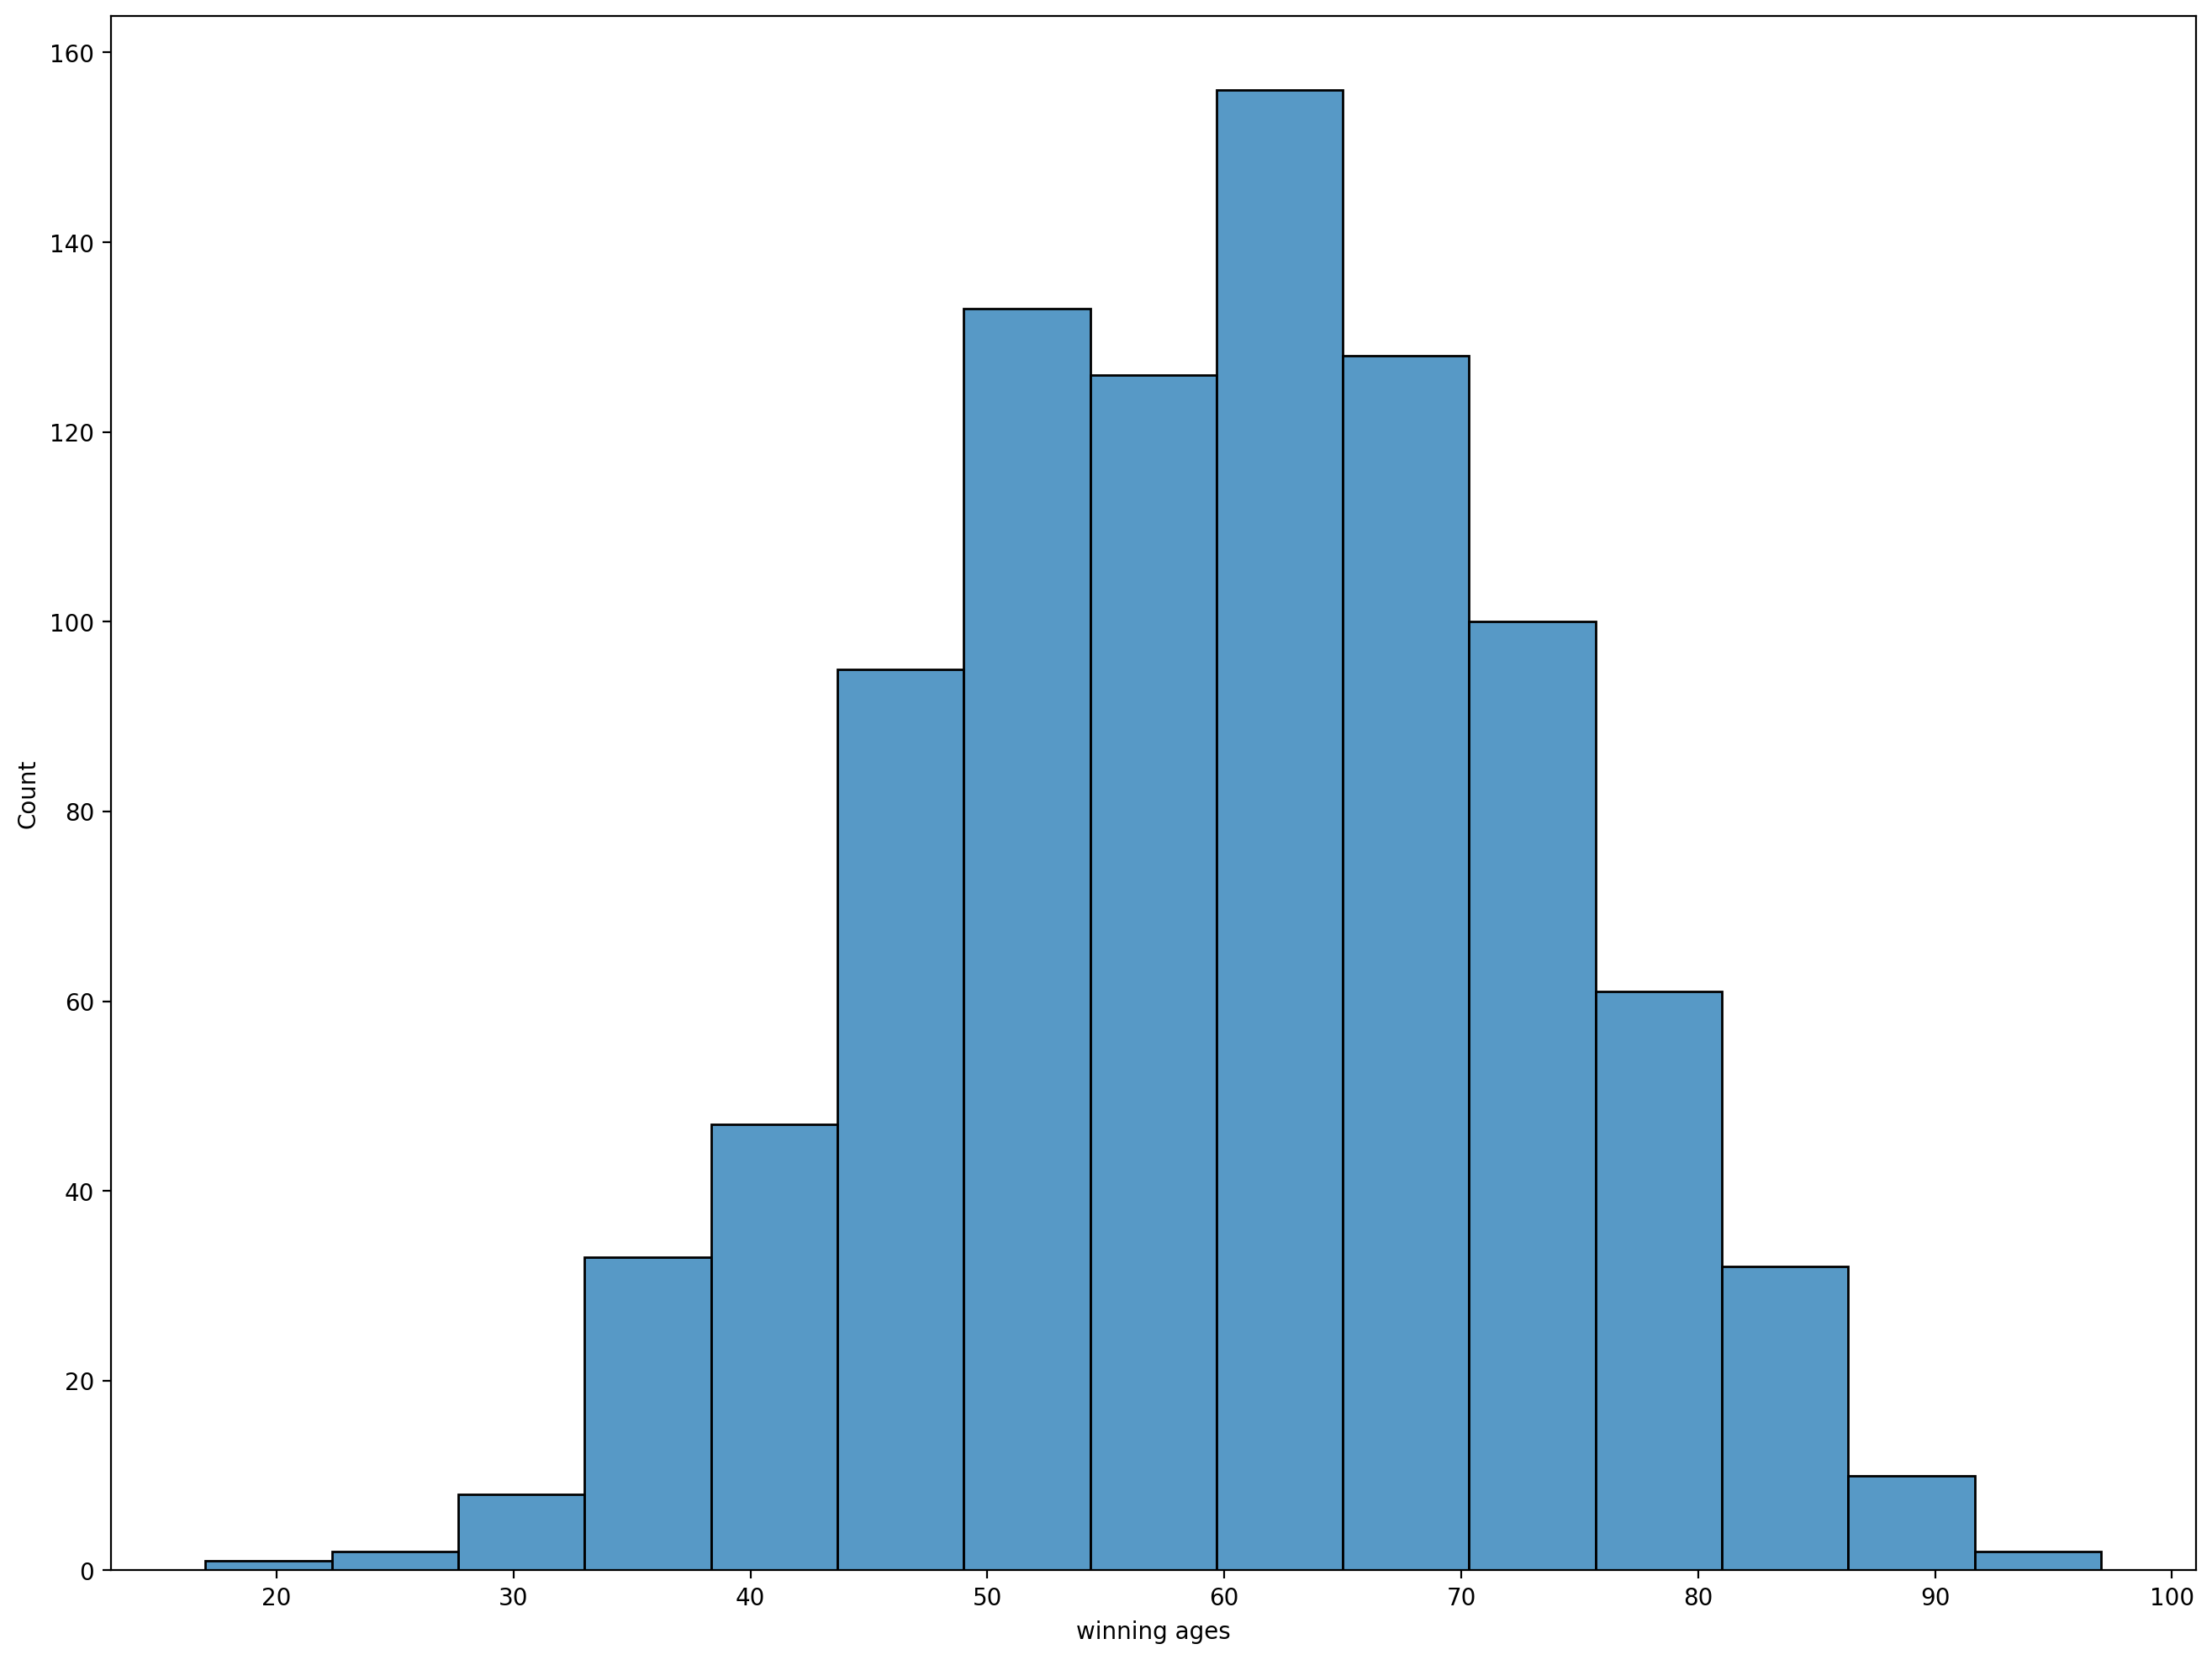

In [151]:
plt.figure(figsize=(16,12),dpi=200)
histplotting = sns.histplot(data=df_data,
                           x = 'winning_age',
                           bins=15,
                            )
plt.xlabel('winning ages')
histplotting

### Age at Time of Award throughout History

Are Nobel laureates being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?

**Challenge**

* Use Seaborn to [create a .regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot) with a trendline.
* Set the `lowess` parameter to `True` to show a moving average of the linear fit.
* According to the best fit line, how old were Nobel laureates in the years 1900-1940 when they were awarded the prize?
* According to the best fit line, what age would it predict for a Nobel laureate in 2020?


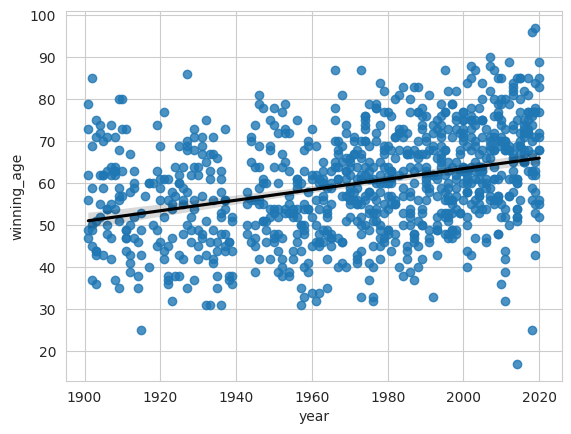

In [171]:
# plotting data using seaborn 
with sns.axes_style(style='whitegrid'):
    sns.regplot(data=df_data,
               x = 'year',
               y= 'winning_age',
               line_kws={'color': 'black'},
               )

plt.show()

### Winning Age Across the Nobel Prize Categories

How does the age of laureates vary by category? 

* Use Seaborn's [`.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot) to show how the mean, quartiles, max, and minimum values vary across categories. Which category has the longest "whiskers"? 
* In which prize category are the average winners the oldest?
* In which prize category are the average winners the youngest?

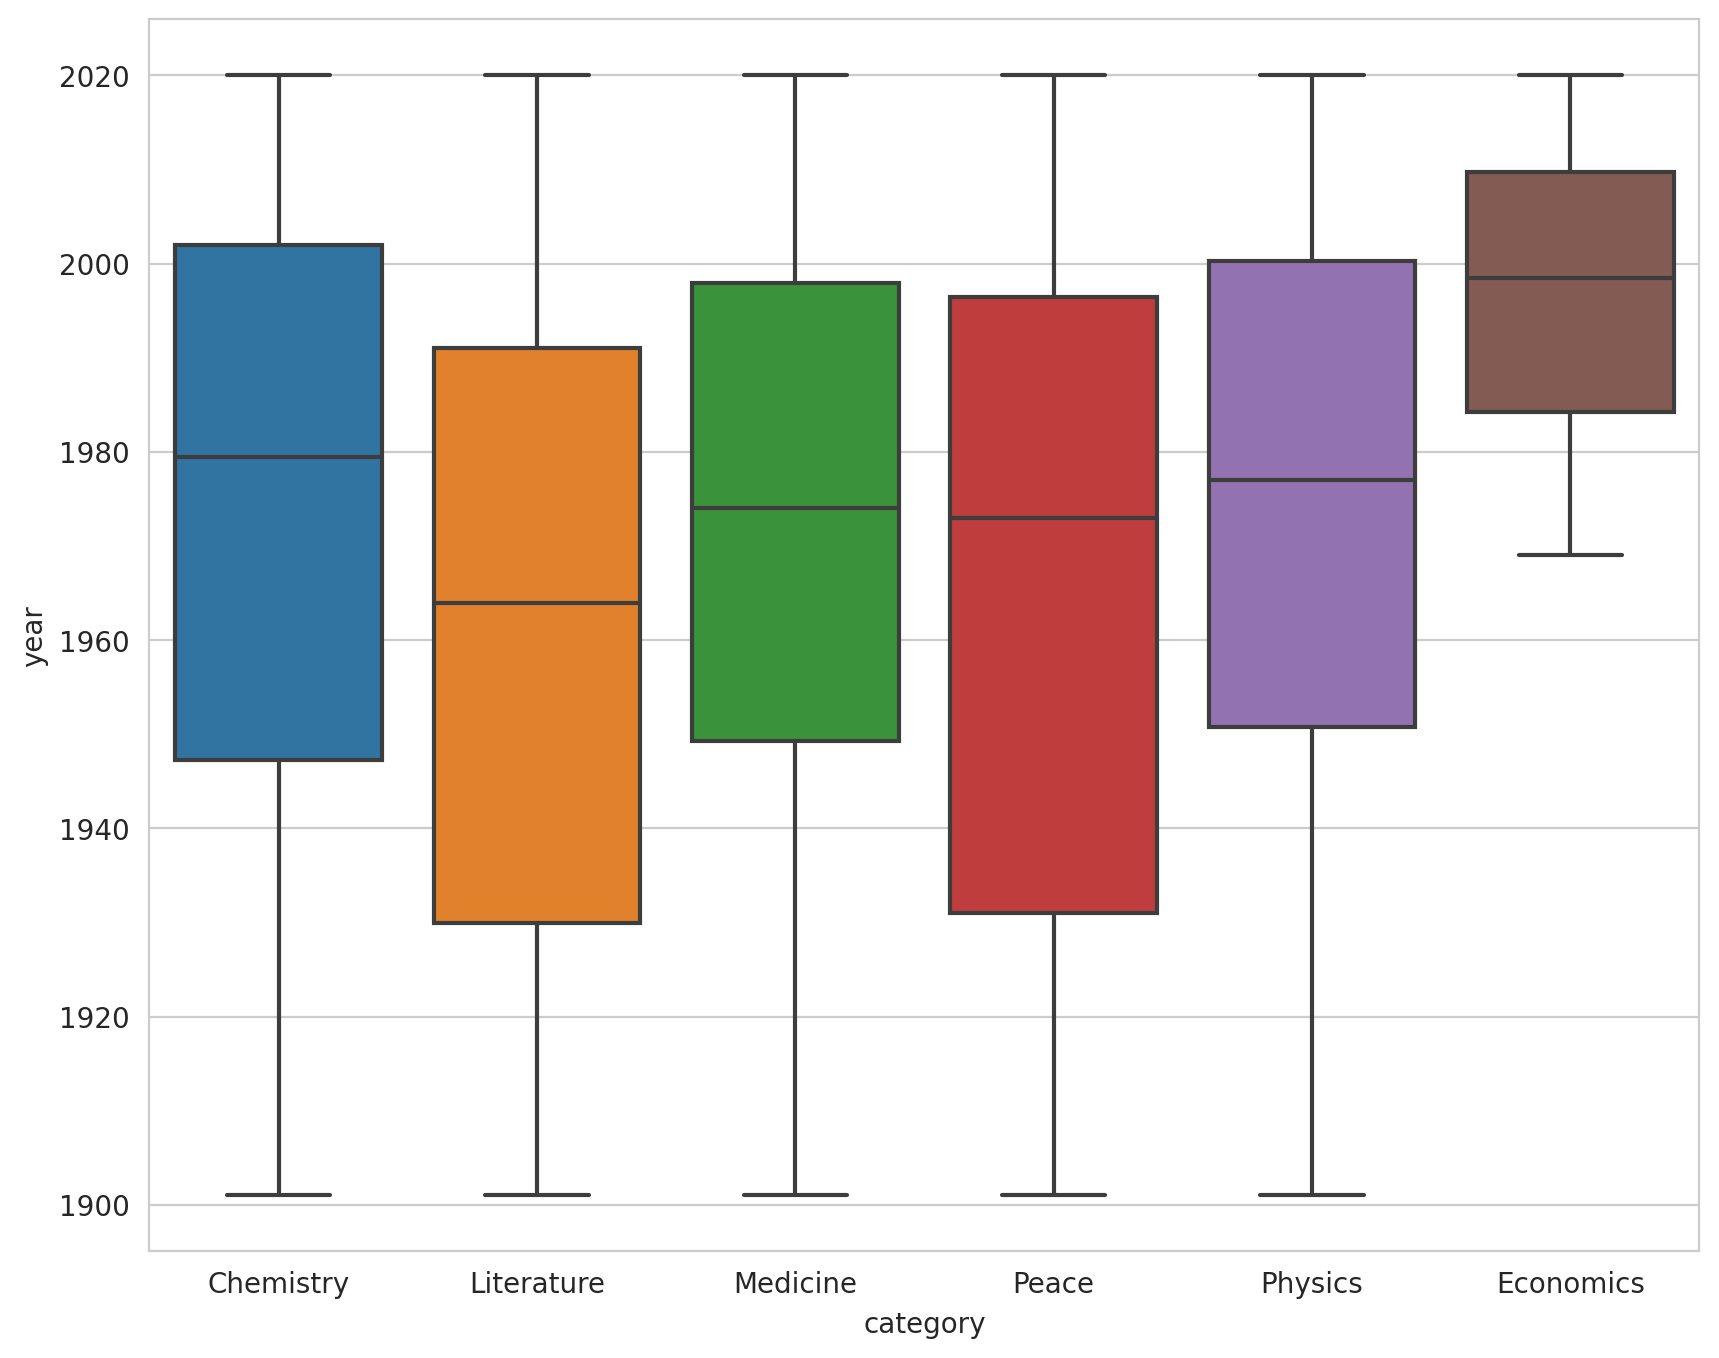

In [182]:
plt.figure(figsize=(10,8),dpi=200)
with sns.axes_style(style='whitegrid'):
    sns.boxplot(data=df_data,
           y='year',
           x = 'category')

**Challenge**
* Now use Seaborn's [`.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot) and the `row` parameter to create 6 separate charts for each prize category. Again set `lowess` to `True`.
* What are the winning age trends in each category? 
* Which category has the age trending up and which category has the age trending down? 
* Is this `.lmplot()` telling a different story from the `.boxplot()`?
* Create another chart with Seaborn. This time use `.lmplot()` to put all 6 categories on the same chart using the `hue` parameter. 


#### we van easily use the "hue" command to combine charts to a single in seaborn or use the 
#### "row" command to seperate the various charts

<Figure size 3200x2400 with 0 Axes>

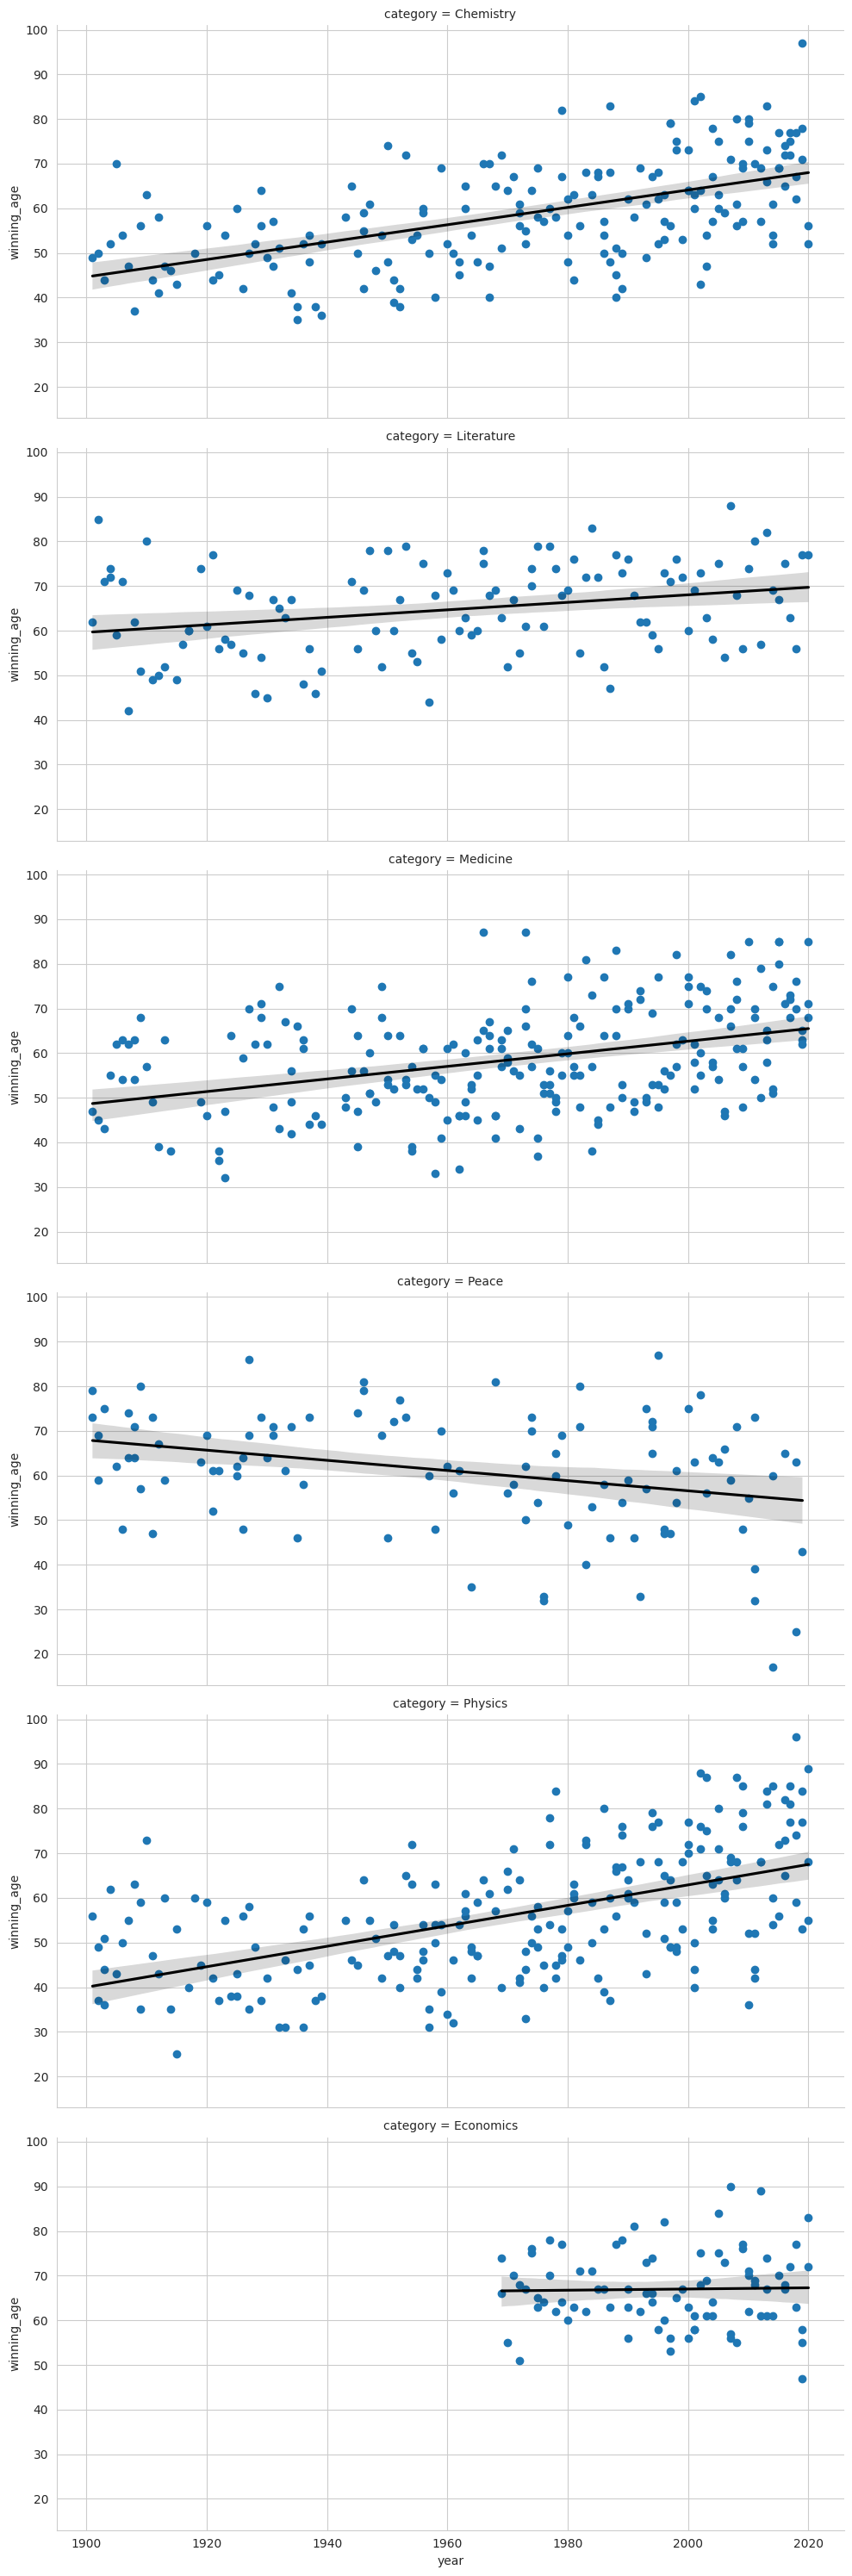

In [173]:
# plotting data using seaborn 
plt.figure(figsize=(16,12),dpi=200)

with sns.axes_style(style='whitegrid'):
    sns.lmplot(data=df_data,
               x = 'year',
               y= 'winning_age',
                row = 'category',
               line_kws={'color': 'black'},
               scatter_kws={'alpha':1},
               aspect=2
               )

plt.show()

# using the hue command 

<Figure size 3200x2400 with 0 Axes>

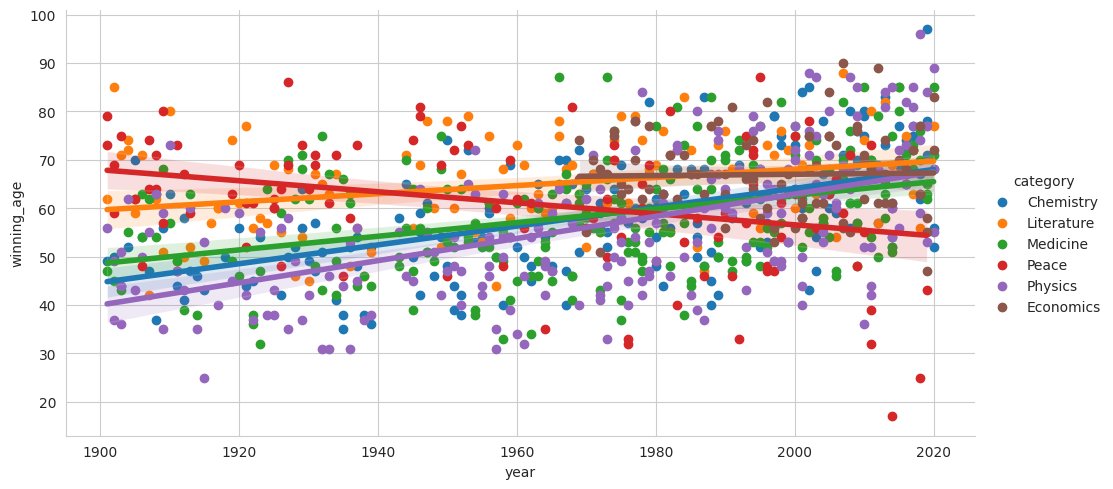

In [179]:
# plotting data using seaborn 
plt.figure(figsize=(16,12),dpi=200)

with sns.axes_style(style='whitegrid'):
    sns.lmplot(data=df_data,
               x = 'year',
               y= 'winning_age',
                hue= 'category',
               line_kws={'linewidth':4},
               scatter_kws={'alpha':1},
               aspect=2,
              
               )

plt.show()